In [1]:
import pandas as pd

In [2]:
import numpy as np

In [4]:
data=pd.read_csv("C:\\Users\\spoor\\Downloads\\Bengaluru_House_Data.csv")

In [5]:
df=pd.DataFrame(data)

In [6]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [9]:
df.shape

(13320, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [15]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [16]:
df = df.drop(columns=['society'], errors='ignore')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [17]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price'],
      dtype='object')

In [19]:
num_cols=['bath','balcony']
for col in num_cols:
    if col in df.columns:
        df[col]=df[col].fillna(df[col].median())

In [20]:
# total_sqft cleanup
def convert_sqft(x):
  if isinstance(x,str) and '-' in x:
    a,b = x.split('-')
    return (float(a)+float(b))/2
  try:
    return float(x)
  except:
    return None

In [21]:
df['total_sqft']=df['total_sqft'].apply(convert_sqft)
df.dropna(subset=['total_sqft'],inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


In [24]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], shape=(1300,), dtype=object)

In [25]:
df['location'].nunique

<bound method IndexOpsMixin.nunique of 0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
12700           Green Glen Layout
12701                  Whitefield
12702               Richards Town
12703       Raja Rajeshwari Nagar
12704             Padmanabhanagar
Name: location, Length: 12705, dtype: object>

In [26]:
#avg house price for each location
avg_price_location = df.groupby('location')['price'].mean().sort_values(ascending=False)
print(avg_price_location)

location
Cubbon Road                  1900.000000
Ashok Nagar                  1486.000000
Defence Colony               1167.714286
Yemlur                       1093.388889
Church Street                1068.000000
                                ...     
Celebrity Paradise Layout      19.245000
BAGUR                          17.000000
Makali                         16.000000
 Anekal                        16.000000
Alur                           15.000000
Name: price, Length: 1299, dtype: float64


In [29]:
#which location has highest avg price
avg_price_location.max()
highest=df.groupby('location')['price'].mean().sort_values(ascending=False).head(1)
print(highest)

location
Cubbon Road    1900.0
Name: price, dtype: float64


In [30]:
df[['price', 'total_sqft', 'bath']].corr()

,price,total_sqft,bath
price,1.000000,0.573854,0.450554
total_sqft,0.573854,1.000000,0.385360
bath,0.450554,0.385360,1.000000


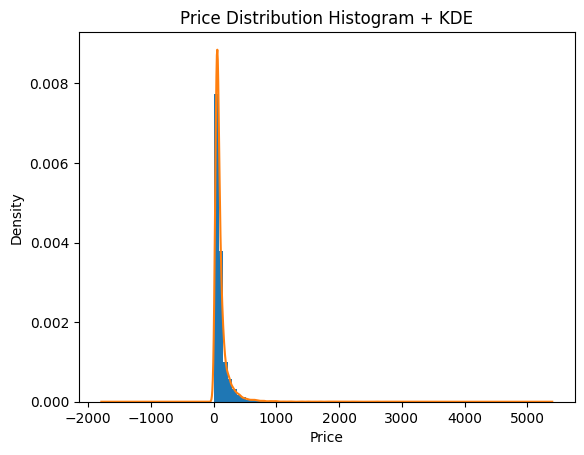

In [31]:
import matplotlib.pyplot as plt

plt.figure()
df['price'].plot(kind='hist', bins=50, density=True)
df['price'].plot(kind='kde')
plt.xlabel("Price")
plt.title("Price Distribution Histogram + KDE")
plt.show()


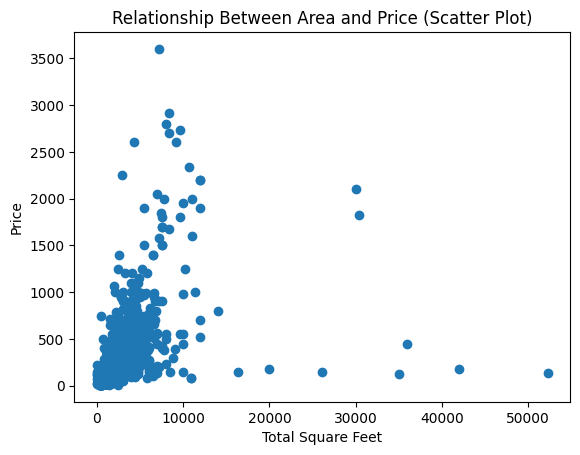

In [32]:
plt.figure()
plt.scatter(df['total_sqft'], df['price'])
plt.xlabel("Total Square Feet")
plt.ylabel("Price")
plt.title("Relationship Between Area and Price (Scatter Plot)")
plt.show()


<Figure size 1000x600 with 0 Axes>

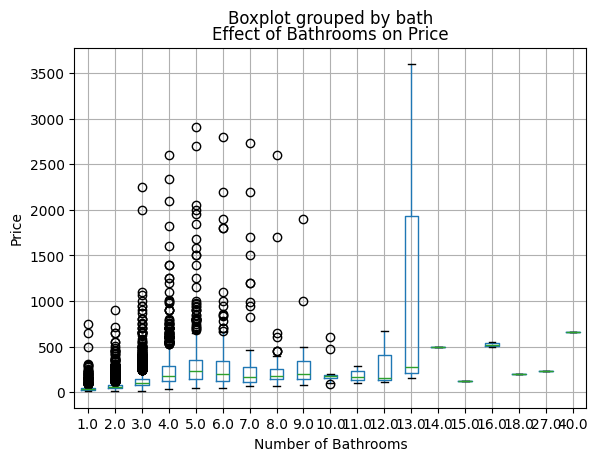

In [33]:
plt.figure(figsize=(10,6))
df.boxplot(column='price', by='bath')
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price")
plt.title("Effect of Bathrooms on Price")
plt.show()


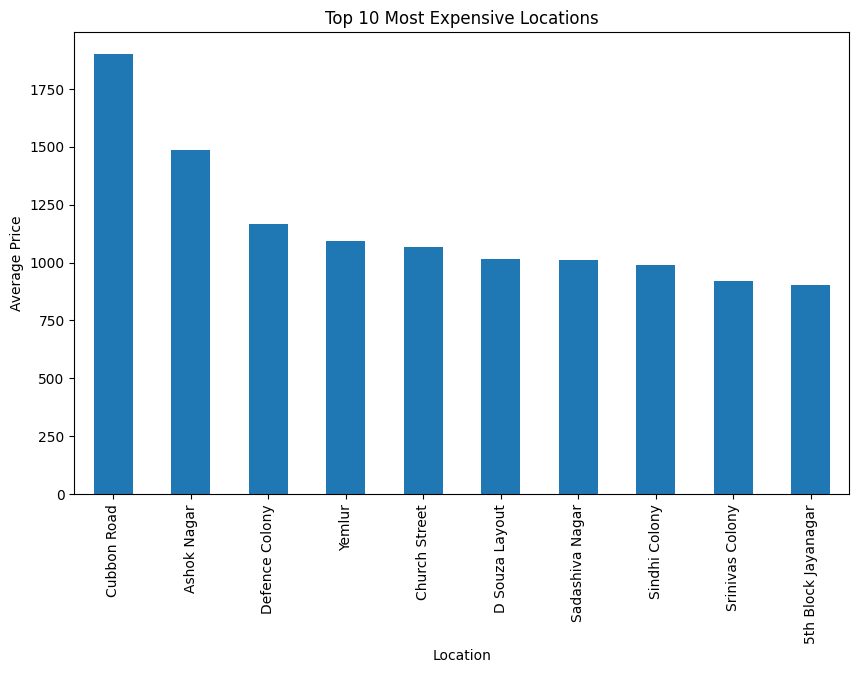

In [34]:
avg_price_location = df.groupby('location')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
avg_price_location.plot(kind='bar')
plt.xlabel("Location")
plt.ylabel("Average Price")
plt.title("Top 10 Most Expensive Locations")
plt.show()


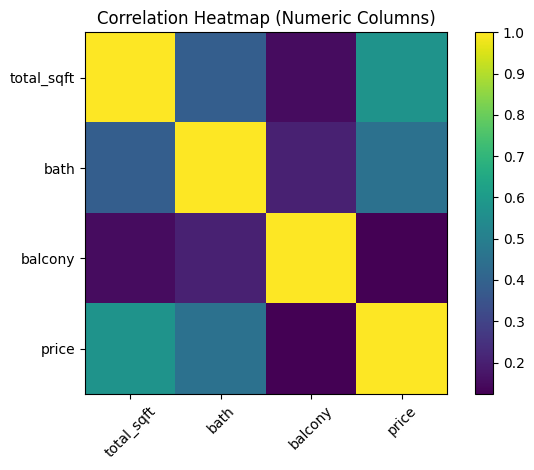

In [35]:
corr = df.corr(numeric_only=True)

plt.figure()
plt.imshow(corr, interpolation='nearest')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap (Numeric Columns)")
plt.colorbar()
plt.tight_layout()
plt.show()


In [36]:
df.to_csv("C:\\Users\\spoor\\Downloads\\Cleaned_House_Price_Data.csv", index=False)